Download dataset from https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification/code .
Store it in the root folder for the project which contains this python script.

In [1]:
# For data handling
import pandas as pd
import numpy as np

# For feature extraction
import librosa 

# For making a model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# For preprocessing data and splitting data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# For plotting accuracy values over epochs
import matplotlib.pyplot as plt

In [2]:
dir(librosa.feature)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'delta',
 'fourier_tempogram',
 'inverse',
 'melspectrogram',
 'mfcc',
 'poly_features',
 'rhythm',
 'rms',
 'spectral',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_flatness',
 'spectral_rolloff',
 'stack_memory',
 'tempogram',
 'tonnetz',
 'utils',
 'zero_crossing_rate']

In [3]:
data = pd.read_csv('Data/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [5]:
df = data.sample(frac = 1)

In [6]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
7469,pop.00047.7.wav,66149,0.470581,0.072275,0.172410,0.006369,3205.787117,897941.938287,3081.093566,106659.398276,...,45.096813,-4.415296,70.338745,2.120565,114.061829,4.597603,125.636719,7.705455,72.409935,pop
123,blues.00012.3.wav,66149,0.306594,0.092890,0.081493,0.002274,1689.086839,340715.692086,1701.360901,53586.210578,...,78.446518,-8.853570,77.000359,5.010650,60.485088,7.191926,142.952271,-5.235569,83.829659,blues
9910,rock.00092.0.wav,66149,0.429061,0.073597,0.099818,0.000248,2479.915248,91128.585359,2108.100140,16442.011509,...,19.131958,-15.139388,16.678892,-1.191522,23.426479,-14.682848,27.017971,-0.219052,18.501019,rock
8254,reggae.00026.2.wav,66149,0.424991,0.096255,0.125455,0.004377,1704.196498,589916.351442,1985.485871,258934.495735,...,63.899956,-11.154947,139.621170,1.950567,98.602791,-4.310064,95.129341,-3.273939,78.935173,reggae
8128,reggae.00013.6.wav,66149,0.415781,0.092061,0.108018,0.002099,1297.585450,428863.481098,1834.739160,355591.982905,...,72.035728,-3.883538,96.369186,-4.553617,102.153946,0.087227,62.276810,0.982933,97.094994,reggae


In [7]:
# Drop all filenames
df = df.drop(labels='filename',axis=1)

In [8]:
# Getthe genre list to generate labels
genre_list = df.iloc[:, -1]

encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[7 0 9 ... 8 2 9]


In [9]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
# Create model
m = Sequential()
m.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],), name='layer1'))
m.add(layers.Dense(512, activation='relu', name='layer2'))
m.add(layers.Dense(256, activation='relu', name='layer3'))
m.add(layers.Dense(128, activation='relu', name='layer4'))
m.add(layers.Dense(64, activation='relu', name='layer5'))
m.add(layers.Dense(10, activation='softmax', name='output'))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1024)              60416     
_________________________________________________________________
layer2 (Dense)               (None, 512)               524800    
_________________________________________________________________
layer3 (Dense)               (None, 256)               131328    
_________________________________________________________________
layer4 (Dense)               (None, 128)               32896     
_________________________________________________________________
layer5 (Dense)               (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 758,346
Trainable params: 758,346
Non-trainable params: 0
__________________________________________________

In [12]:
classifier = m.fit(X_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
59/59 [==============================] - 1s 2ms/step - loss: 1.4832 - accuracy: 0.4854
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 0.7339 - accuracy: 0.7408
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.8281
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8571
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9150
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.9391
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.1723 - accuracy: 0.9412
Epoch 8/100
59/59 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9621
Epoch 9/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9755
Epoch 10/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9754
Epoch 11/

59/59 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.9994
Epoch 83/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9994
Epoch 84/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9993
Epoch 85/100
59/59 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.9986
Epoch 86/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9987
Epoch 87/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9988
Epoch 88/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9992
Epoch 89/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9994
Epoch 90/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9995
Epoch 91/100
59/59 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.9988
Epoch 92/100


In [13]:
loss, acc  = m.evaluate(X_test, y_test, batch_size=128)
print('Loss = ',loss,'Accuracy = ',acc)

20/20 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.9247
Loss =  0.5270135402679443 Accuracy =  0.9247397780418396


In [14]:
history = m.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4979 - accuracy: 0.8572 - val_loss: 0.6101 - val_accuracy: 0.8203
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.9166 - val_loss: 0.4241 - val_accuracy: 0.8775
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9654 - val_loss: 0.4401 - val_accuracy: 0.8847
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9766 - val_loss: 0.4720 - val_accuracy: 0.8795
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.4651 - val_accuracy: 0.8935
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9842 - val_loss: 0.4747 - val_accuracy: 0.8907
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9788 - val_loss: 0.4284 - val_accuracy: 0.8883

Epoch 58/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9903 - val_loss: 0.5816 - val_accuracy: 0.8955
Epoch 59/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.5617 - val_accuracy: 0.9139
Epoch 60/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 0.6690 - val_accuracy: 0.9023
Epoch 61/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.5399 - val_accuracy: 0.9155
Epoch 62/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.5870 - val_accuracy: 0.9115
Epoch 63/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.7145 - val_accuracy: 0.8959
Epoch 64/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9888 - val_loss: 0.5512 - val_accuracy:

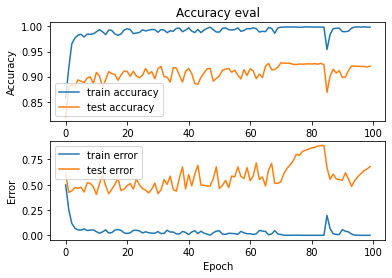

In [15]:
fig,axs = plt.subplots(2)
axs[0].plot(history.history["accuracy"],label="train accuracy")
axs[0].plot(history.history["val_accuracy"],label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc='lower left')
axs[0].set_title("Accuracy eval")
    
axs[1].plot(history.history["loss"],label="train error")
axs[1].plot(history.history["val_loss"],label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc='upper left')
plt.show()

In [16]:
history = m.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=8)

Epoch 1/100
937/937 [==============================] - 2s 2ms/step - loss: 0.2050 - accuracy: 0.9505 - val_loss: 0.6770 - val_accuracy: 0.8507
Epoch 2/100
937/937 [==============================] - 2s 2ms/step - loss: 0.1424 - accuracy: 0.9702 - val_loss: 0.5096 - val_accuracy: 0.8903
Epoch 3/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0589 - accuracy: 0.9860 - val_loss: 0.5900 - val_accuracy: 0.8999
Epoch 4/100
937/937 [==============================] - 2s 2ms/step - loss: 0.0786 - accuracy: 0.9837 - val_loss: 0.6272 - val_accuracy: 0.9091
Epoch 5/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9793 - val_loss: 0.6437 - val_accuracy: 0.8775
Epoch 6/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9848 - val_loss: 0.5809 - val_accuracy: 0.8955
Epoch 7/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9847 - val_loss: 0.6756 - val_accuracy: 0.8779

Epoch 58/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9940 - val_loss: 0.8742 - val_accuracy: 0.9011
Epoch 59/100
937/937 [==============================] - 2s 2ms/step - loss: 0.0271 - accuracy: 0.9945 - val_loss: 0.9712 - val_accuracy: 0.8879
Epoch 60/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0382 - accuracy: 0.9924 - val_loss: 0.9575 - val_accuracy: 0.9055
Epoch 61/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0695 - accuracy: 0.9869 - val_loss: 0.9178 - val_accuracy: 0.9007
Epoch 62/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.9909 - val_loss: 1.0040 - val_accuracy: 0.8995
Epoch 63/100
937/937 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9956 - val_loss: 1.1695 - val_accuracy: 0.9147
Epoch 64/100
937/937 [==============================] - 2s 2ms/step - loss: 0.0883 - accuracy: 0.9897 - val_loss: 1.1169 - val_accuracy:

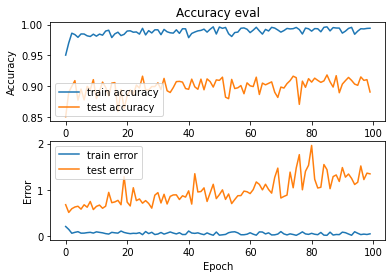

In [17]:
fig,axs = plt.subplots(2)
axs[0].plot(history.history["accuracy"],label="train accuracy")
axs[0].plot(history.history["val_accuracy"],label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc='lower left')
axs[0].set_title("Accuracy eval")
    
axs[1].plot(history.history["loss"],label="train error")
axs[1].plot(history.history["val_loss"],label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc='upper left')
plt.show()